# Spatial data in R

(This tutorial is inspired by [this very useful spatial R tutorial](http://rspatial.org/spatial/index.html) written by Robert Hijmans.)
________
## Introduction tutorial

If you are completely new to R, have a look at [this general R introduction tutorial](http://rspatial.org/intr/rst/1-introduction.html). It is very lengthy but well written and easy to follow. Don't spend to much time on it, but try to understand the basic R syntax and once you feel like you get a hang of it, get started with this spatial tutorial here.

Before we jump into working with real spatial data, let's first learn a bit more about the basic types of objects we will be working with. In general one can decide between two differnt types of spatial data: **vectors and rasters**.

**Vectors** are used to represent discrete objects with clear boundaries, e.g. sampling locations, rivers, roads, country borders etc. 

**Rasters** are applied to represent continuous phenomena, or “spatial fields”, e.g. elevation, temperature, or species diversity.

___________
### 1. Vector data

Let's first go through the basic types of vector data that are used in spatial analyses, which are points, lines, and polygons. 

First we create some fake data. Let's pretend we are creating data for 10 taxa with the names `A`-`J`. For each of these taxa we have a sampling location (`sampling_sites`) and a body size measurement in cm (`body_size`).

In [3]:
# create taxon names
name <- LETTERS[1:10]

# generate sampling locations
longitude <- c(-116.7, -120.4, -116.7, -113.5, -115.5,
               -120.8, -119.5, -113.7, -113.7, -110.7)
latitude <- c(45.3, 42.6, 38.9, 42.1, 35.7, 38.9,
              36.2, 39, 41.6, 36.9)
# this command simply combines the two arrays longitude and latitude into a shared matrix
sampling_sites <- cbind(longitude, latitude)

# define body sizes of sampled individuals
body_size = c(11,15,17,19,22,12,21,14,9,18)

We can join all of this data in one data frame in order to keep it together and sorted:

In [4]:
# join data in a single dataframe
wst <- data.frame(longitude, latitude, name, body_size)
wst

longitude,latitude,name,body_size
-116.7,45.3,A,11
-120.4,42.6,B,15
-116.7,38.9,C,17
-113.5,42.1,D,19
-115.5,35.7,E,22
-120.8,38.9,F,12
-119.5,36.2,G,21
-113.7,39.0,H,14
-113.7,41.6,I,9
-110.7,36.9,J,18


If we want to extract columns from this dataframe we can do that by using square brackets `[]` and the index of the column (or sets of columns) that we want to extract. Within the square brackets, you can specify the lines and columns to extract, uisng the following indexing syntax `[lines,columns]`. E.g. if we want to extract the first two columns (and all lines) we can do it like this (the `,` is important to tell R that you are ferreing to columns):

In [5]:
wst[,1:2]

longitude,latitude
-116.7,45.3
-120.4,42.6
-116.7,38.9
-113.5,42.1
-115.5,35.7
-120.8,38.9
-119.5,36.2
-113.7,39.0
-113.7,41.6
-110.7,36.9


Likewise if you want ot extract the first 3 lines you can type:

In [6]:
wst[1:3,]

longitude,latitude,name,body_size
-116.7,45.3,A,11
-120.4,42.6,B,15
-116.7,38.9,C,17


#### Points
Now let's plot the data **points** (coordinates) in a coordinate system:

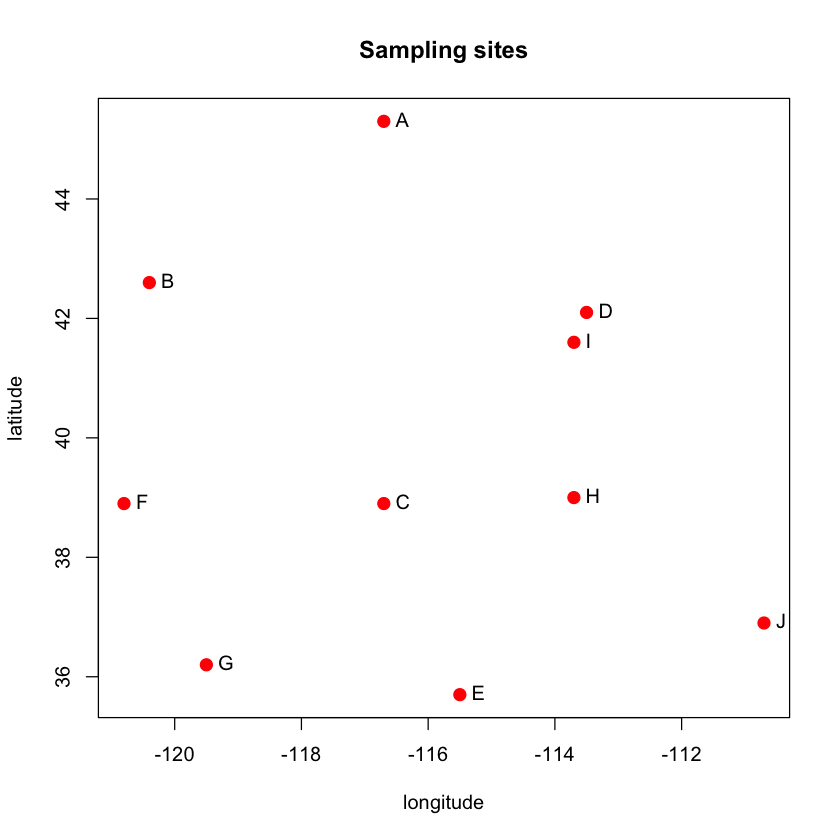

In [7]:
plot(sampling_sites, cex=2, pch=20, col='red', main='Sampling sites')
# add names to plot
text(sampling_sites, name, pos=4)

As you see in our plot we didn't plot a map, but instead a simple coordinate system. However the spatial relationships between the points are plotted in the correct ratios based on their latitude and longitude coordinates. In principle, plotting points on a map is just plotting in a regular coordinate system (as above) with a fancy background.

#### Lines
We can also plot **lines** connecting our dots from above, using the `lines()` function. Here we are only **plotting** our points as lines but later we will see how to define line objects, which besides the point coordinate information also carry the information in which order the points are connected. This can be used e.g. to visualize a time chronology of sampling.

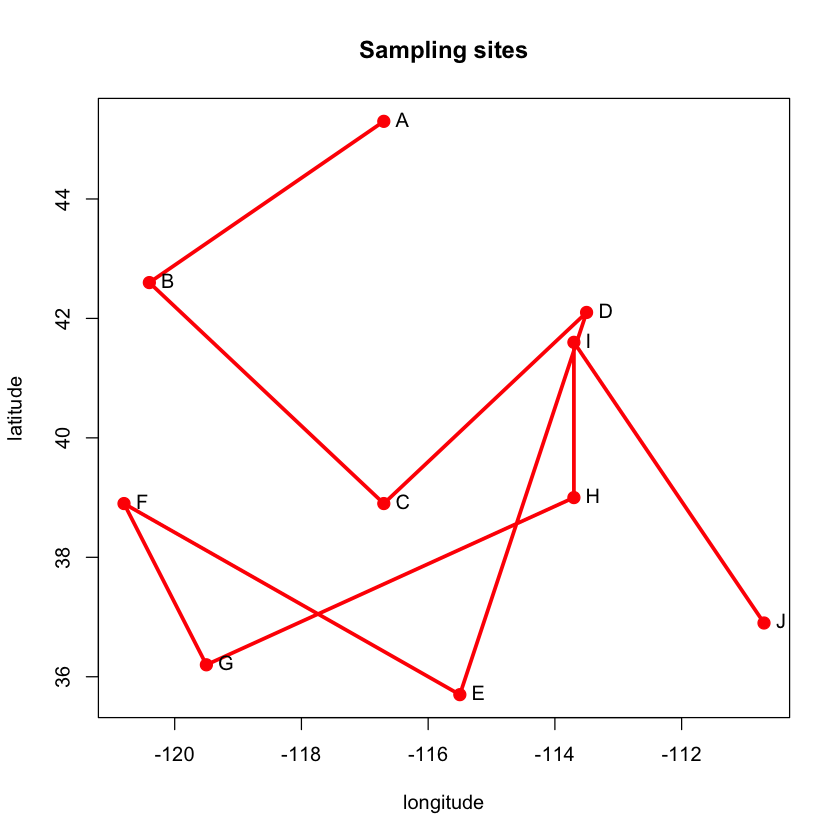

In [8]:
# first plot the points just as we did previously
plot(sampling_sites, cex=2, pch=20, col='red', main='Sampling sites')
# draw lines between data points
lines(sampling_sites, lwd=3, col='red')
text(sampling_sites, name, pos=4)

#### Polygons
We can also plot a **polygon** from the same data, using the `polygon()` function.

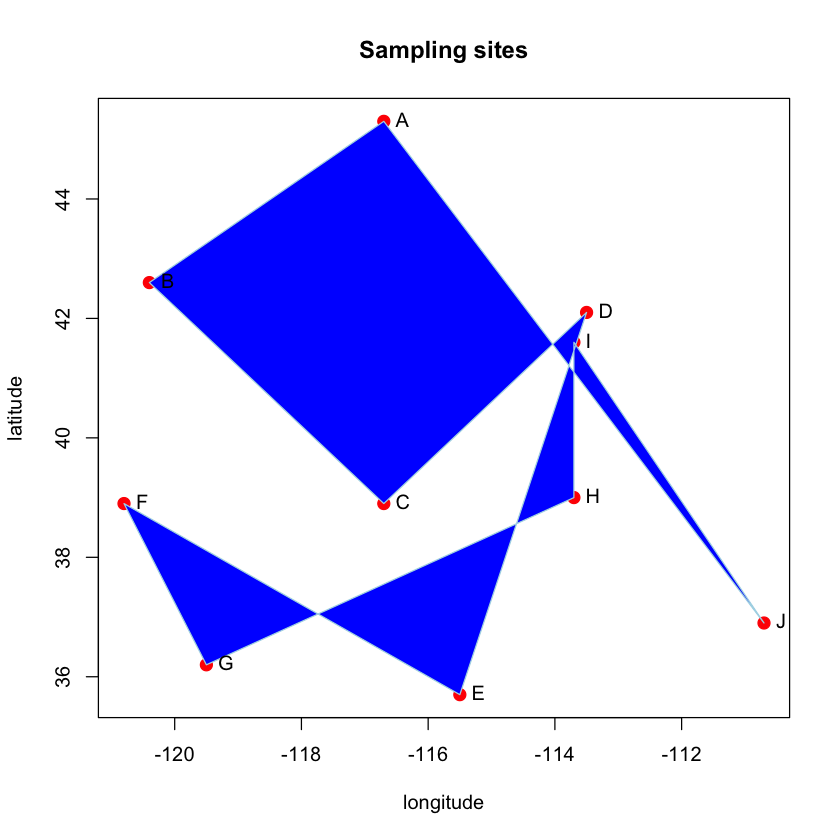

In [9]:
plot(sampling_sites, cex=2, pch=20, col='red', main='Sampling sites')
polygon(sampling_sites, col='blue', border='light blue')
text(sampling_sites, name, pos=4)
#as.character(1:10)

As you can see, also in case of polygons it matters in which order the points are stored. Let's reorder our data points and see how the polygon changes:

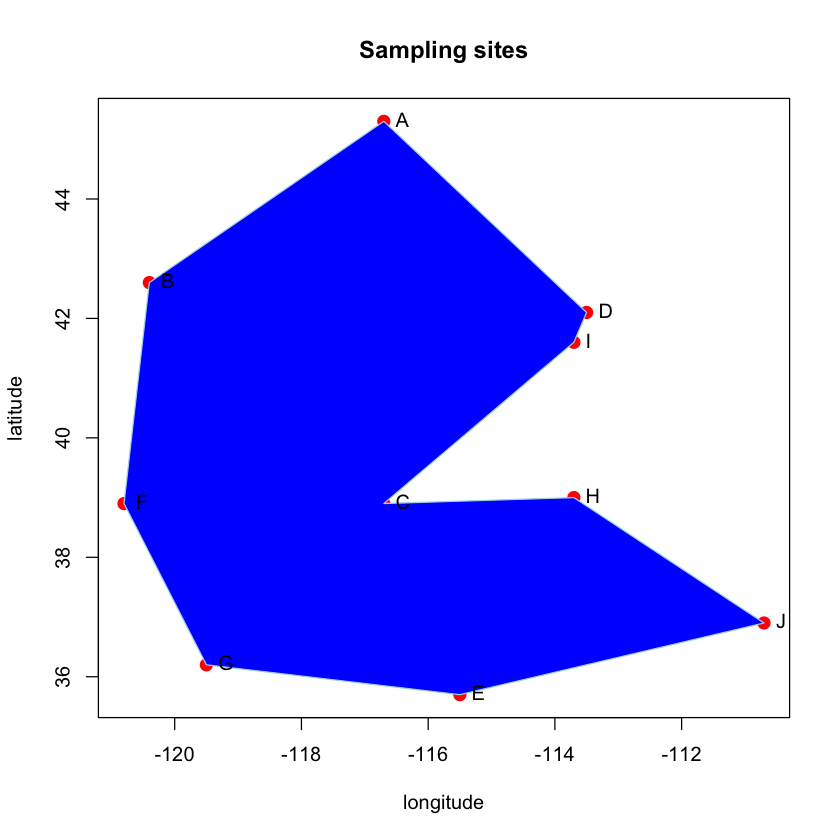

In [10]:
reordered_sampling_sites = sampling_sites[ c(1,2,6,7,5,10,8,3,9,4), ]
plot(reordered_sampling_sites, cex=2, pch=20, col='red', main='Sampling sites')
polygon(reordered_sampling_sites, col='blue', border='light blue')
text(sampling_sites, name, pos=4)

#### Defining spatial objects

So far we have just worked with simple data points stored in a matrix. However, different data objects exist that are specifically designed to handle spatial data. Some of the most commonly used objects are defined in the `sp` package. For vector data, the basic types are the `SpatialPoints()`, `SpatialLines()`, and `SpatialPolygons()`. These data objects only represent geometries. To also store attributes, additional data objects are available with these names plus 'DataFrame', for example, `SpatialPolygonsDataFrame()` and `SpatialPointsDataFrame()`.


In [11]:
library(sp)
pts <- SpatialPoints(sampling_sites)
# use the showDefault() option to view th content of the object
showDefault(pts)

An object of class "SpatialPoints"
Slot "coords":
      longitude latitude
 [1,]    -116.7     45.3
 [2,]    -120.4     42.6
 [3,]    -116.7     38.9
 [4,]    -113.5     42.1
 [5,]    -115.5     35.7
 [6,]    -120.8     38.9
 [7,]    -119.5     36.2
 [8,]    -113.7     39.0
 [9,]    -113.7     41.6
[10,]    -110.7     36.9

Slot "bbox":
             min    max
longitude -120.8 -110.7
latitude    35.7   45.3

Slot "proj4string":
CRS arguments: NA 



Let's now use the `SpatialPointsDataFrame()` function to define a spatial object containing additional information about the samples (sample name and measured body size):

In [12]:
additional_data <- data.frame(sample_name=name, body_size=body_size)
ptsdf <- SpatialPointsDataFrame(pts, data=additional_data)
showDefault(ptsdf)

An object of class "SpatialPointsDataFrame"
Slot "data":
   sample_name body_size
1            A        11
2            B        15
3            C        17
4            D        19
5            E        22
6            F        12
7            G        21
8            H        14
9            I         9
10           J        18

Slot "coords.nrs":
numeric(0)

Slot "coords":
      longitude latitude
 [1,]    -116.7     45.3
 [2,]    -120.4     42.6
 [3,]    -116.7     38.9
 [4,]    -113.5     42.1
 [5,]    -115.5     35.7
 [6,]    -120.8     38.9
 [7,]    -119.5     36.2
 [8,]    -113.7     39.0
 [9,]    -113.7     41.6
[10,]    -110.7     36.9

Slot "bbox":
             min    max
longitude -120.8 -110.7
latitude    35.7   45.3

Slot "proj4string":
CRS arguments: NA 



Now we'll use a different function to create a spatial line object using the `spLines()` function. For this we first need to load the package `raster`. We'll also make up some new data, in order to have different data points then for the `SpatialPoints` object from above:

In [13]:
library(raster)
# make up new data
lon <- c(-116.8, -114.2, -112.9, -111.9, -114.2, -115.4, -117.7)
lat <- c(41.3, 42.9, 42.4, 39.8, 37.6, 38.3, 37.6)
lonlat <- cbind(lon, lat)
# store data as spatial lines object
lns <- spLines(lonlat)
lns

SpatialLines:
class       : SpatialLines 
features    : 1 
extent      : -117.7, -111.9, 37.6, 42.9  (xmin, xmax, ymin, ymax)
coord. ref. : NA 
Coordinate Reference System (CRS) arguments: NA 

Similarly we can create a polygon using the `spPolygons()` function:

In [14]:
pols <- spPolygons(lonlat)
pols

class       : SpatialPolygons 
features    : 1 
extent      : -117.7, -111.9, 37.6, 42.9  (xmin, xmax, ymin, ymax)
coord. ref. : NA 

Now let's plot the polygon and on top of it the spatial points.

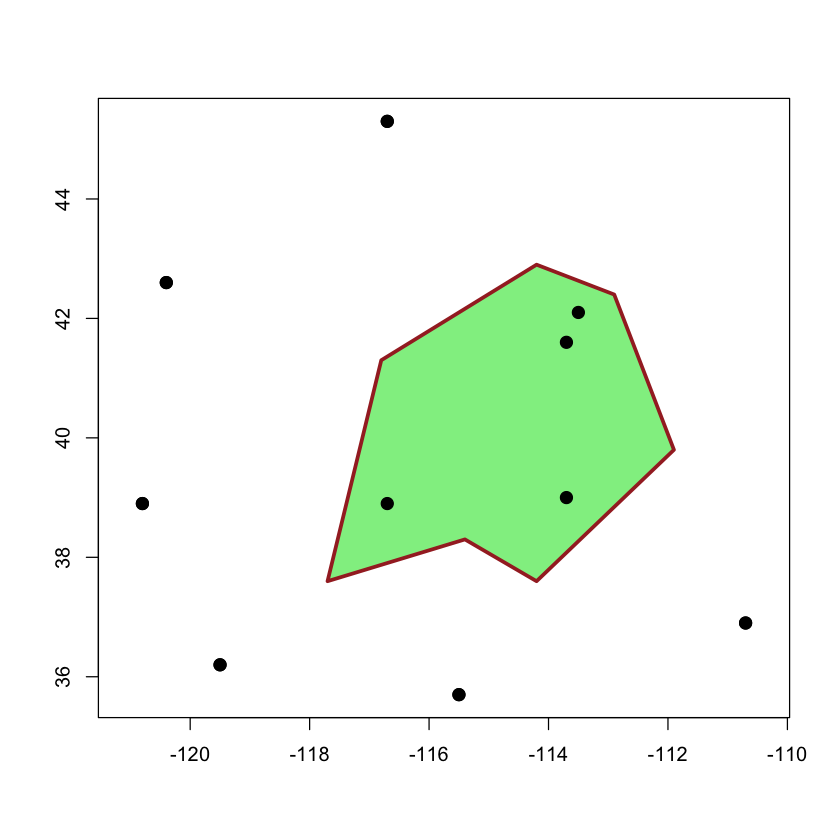

In [15]:
#plot(pols, axes=TRUE, las=1)
plot(pts, col='black', pch=20, cex=2,axes=TRUE)
plot(pols, border='brown', col='lightgreen', lwd=3,add=T)
plot(pts, col='black', pch=20, cex=2,add=T)


You may have noticed that this time we don't have to use the specific plotting functions `polygon()` or `lines()` to tell R what kind of object we want to plot, but instead we are simply using the `plot()` function and R plots the data in the correct form by default, since we have defined the data as the appropiate spatial objects they represent.

### 2. Rasters

Now let's get to working with rasters. The first type of raster object we will work with is called `RasterLayer()` and is defined in the `raster` library.

A RasterLayer object represents single-layer raster data. A RasterLayer object always stores a number of fundamental parameters that describe it. These include the number of columns and rows, the spatial extent, and the Coordinate Reference System.

Here we create a RasterLayer from scratch. But note that in most cases where real data is analyzed, these objects are read from a file.


In [16]:
library(raster)
rast <- raster(ncol=10, nrow=10, xmx=-80, xmn=-150, ymn=20, ymx=60)
rast

class       : RasterLayer 
dimensions  : 10, 10, 100  (nrow, ncol, ncell)
resolution  : 7, 4  (x, y)
extent      : -150, -80, 20, 60  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 


You can see in the last line of the output that by default the `raster()` function created the raster using the coordinate reference system `+proj=longlat +datum=WGS84`. We will learn later what that means.

So far the object we created represents only a skeleton of a raster data set. That is, it knows about its location, resolution, etc., but there are no values associated with it. Let’s fill the skeleton with some made up data. In this case we assign a vector of random numbers (generated from a uniform distribution using the `runif()` function) with a length that is equal to the number of cells of the RasterLayer.

After assigning the random values, let's plot the raster and on top of it add our vecotr objects from earlier (polygon `pols`and points `pts`).


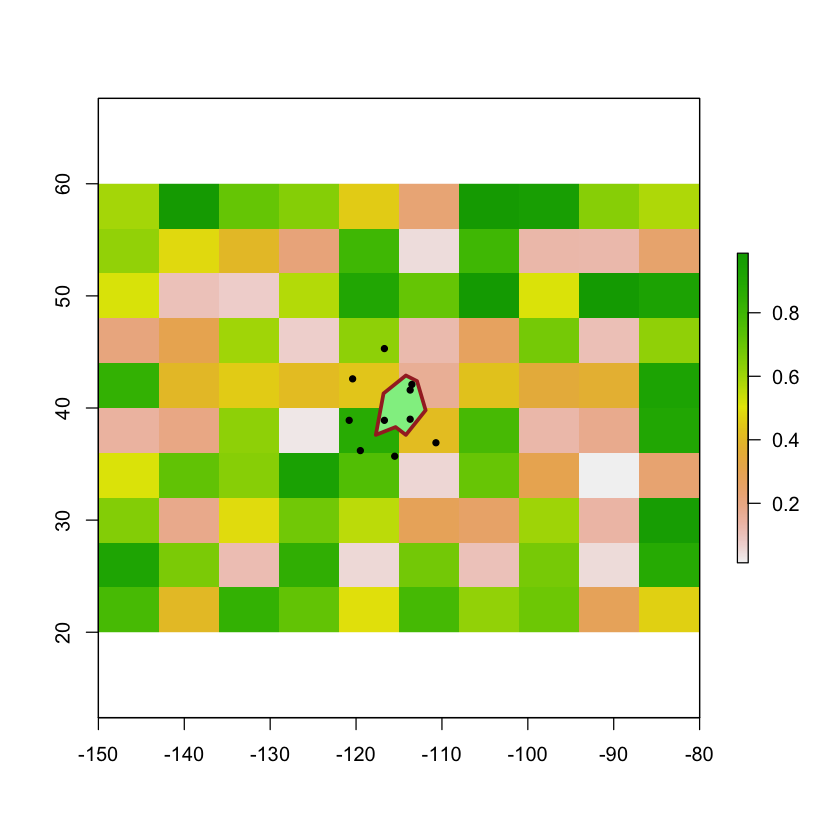

In [17]:
values(rast) <- runif(ncell(rast))
plot(rast)
plot(pols, border='brown', col='lightgreen', lwd=3,add=T)
plot(pts, col='black', pch=20, cex=1,add=T)


### 3. Reading spatial data from file
We can use the `readShapePoly()` function in order to read a shape file as a vectorized polygon into R. 
A shape file is usually made up of at least four parts. The .SHP, the .DBF, the .PRJ and the .SHX.

- **SHP:** This file contains the geometry of each feature.
- **DBF:** This is a database file which contains the attribute data for all of the features in the dataset. The database file is very similar to a sheet in a spreadsheet and can even be opened in Excel.
- **SHX:** The .shx is the spatial index, it allows spatial programs to find features within the .SHP file more quickly.
- **PRJ:** The .prj is the projection file. It contains information about the "projection" and "coordinate system" the data uses.

Below we are going to read a shape file downloaded from [DIVA-GIS](http://www.diva-gis.org/gdata). You can open the link and download your own shape file or work with the example data:

In [19]:
library(sf)
setwd('/Users/tobias/GitHub/workshops/ggbc_slw_neic/spatial_r_workshop')
germany = st_read('./data/DEU_adm/DEU_adm0.shp')

Linking to GEOS 3.6.2, GDAL 2.2.4, proj.4 4.9.3


Reading layer `DEU_adm0' from data source `/Users/tobias/GitHub/workshops/ggbc_slw_neic/spatial_r_workshop/data/DEU_adm/DEU_adm0.shp' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 70 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: 5.871619 ymin: 47.26986 xmax: 15.03811 ymax: 55.05653
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


The object we created using the `st_read()` function is in `sf` format, which represents a data frame. In order to turn it into a `SpatialPolygon` object, we can use the function `as(my_object, 'Spatial')`, where `my_object` in this case is our `sf` object called `germany`:

In [17]:
germany_spatial = as(germany, 'Spatial')

Now let's plot the polygon object we just created:

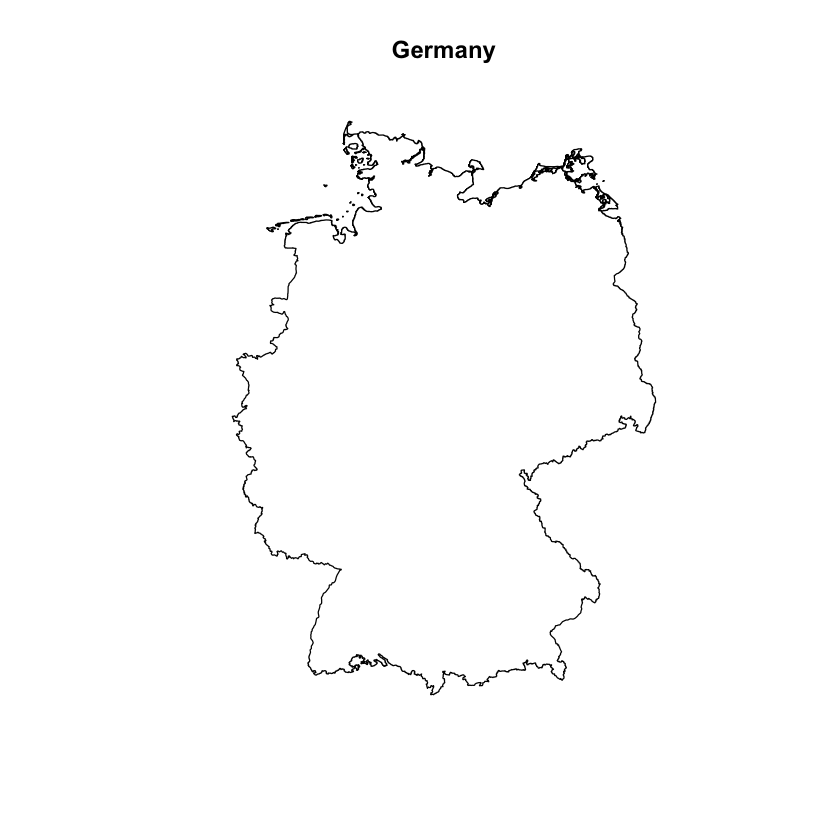

In [18]:
plot(germany_spatial,main='Germany')

Similarly we can read raster data, using the `raster()` function. In this example we are reading altitude information for Germany:

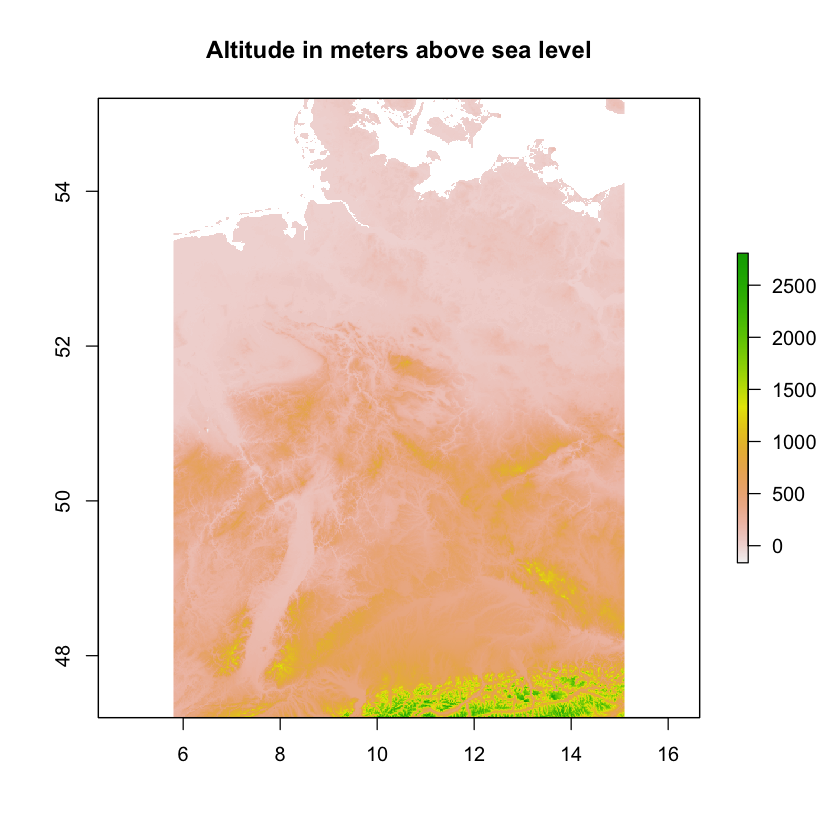

In [19]:
germany_alt_raster = raster('./data/DEU_alt/deu_alt.grd')
plot(germany_alt_raster,main='Altitude in meters above sea level')

For the most informative representation of the data, let's plot the polygon on top of the raster in the same plot:

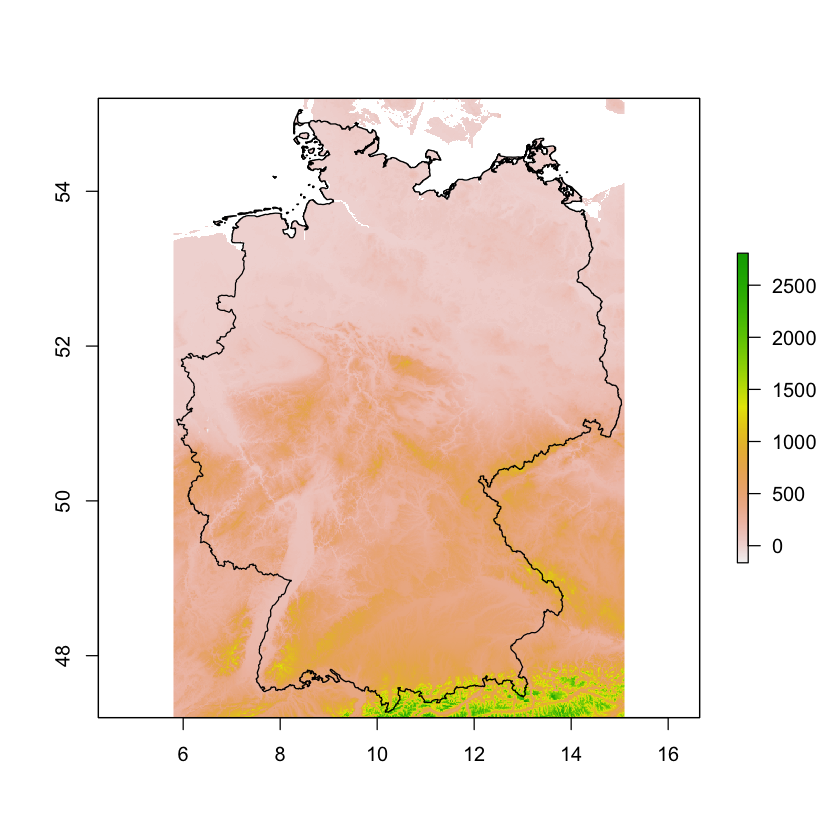

In [20]:
plot(germany_alt_raster)
plot(germany_spatial,add=TRUE)

### 4. Coordinate Reference Systems
Read the sections 6.1 and 6.2 in [this summary about coordinate reference systems](http://rspatial.org/spatial/rst/6-crs.html), which explains the background about different two-dimensional projections of geographic data.

### 5. Working with vector data
Now we are going to play around with a map of Luxembourg in order to demonstrate some of the basic polygon transformation and editing tools:

In [20]:
lux = st_read('./data/luxembourg/lux.shp')
lux
lux_spatial = as(lux, 'Spatial')

Reading layer `lux' from data source `/Users/tobias/GitHub/workshops/ggbc_slw_neic/spatial_r_workshop/data/luxembourg/lux.shp' using driver `ESRI Shapefile'
Simple feature collection with 12 features and 5 fields
geometry type:  POLYGON
dimension:      XY
bbox:           xmin: 5.74414 ymin: 49.44781 xmax: 6.528252 ymax: 50.18162
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


ID_1,NAME_1,ID_2,NAME_2,AREA,geometry
1,Diekirch,1,Clervaux,312,POLYGON ((6.02651882 50.177...
1,Diekirch,2,Diekirch,218,POLYGON ((6.17836761 49.876...
1,Diekirch,3,Redange,259,POLYGON ((5.88137817 49.870...
1,Diekirch,4,Vianden,76,POLYGON ((6.13130856 49.972...
1,Diekirch,5,Wiltz,263,POLYGON ((5.97792864 50.026...
2,Grevenmacher,6,Echternach,188,POLYGON ((6.3855319 49.8370...
2,Grevenmacher,7,Remich,129,POLYGON ((6.3166647 49.6233...
2,Grevenmacher,12,Grevenmacher,210,POLYGON ((6.42515755 49.731...
3,Luxembourg,8,Capellen,185,POLYGON ((5.998312 49.69992...
3,Luxembourg,9,Esch-sur-Alzette,251,POLYGON ((6.03947449 49.448...


You can see that the spatial object we loaded is made up by 12 polygons (lines), which are defined in the last column (`geometry`). There are five different values associated with each polygon which are stored in the columns `ID_1`,`NAME_1`,`ID_2`,`NAME_2`,`AREA`. When plotting the actual `sf` object `lux` (instead of the `SpatialPolygon` object `lux_spatial`), the default plotting function automatically puts out all layers and colors the polygons by their values:

Warning message in classInt::classIntervals(values, nbreaks, breaks):
“n greater than number of different finite values\nn reset to number of different finite values”Warning message in classInt::classIntervals(values, nbreaks, breaks):
“n same as number of different finite values\neach different finite value is a separate class”

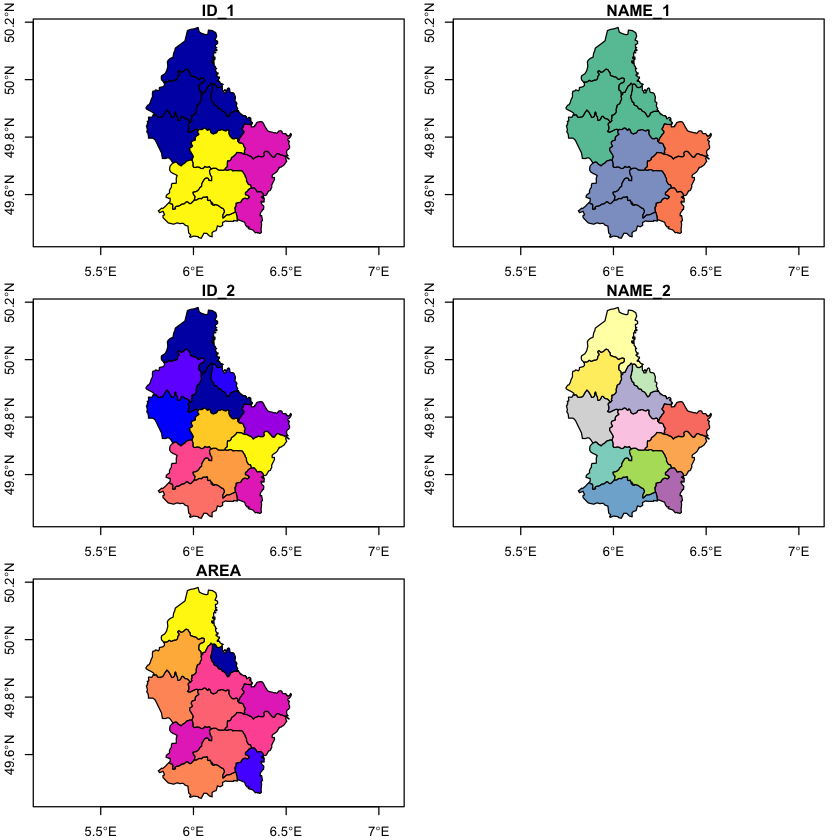

In [21]:
plot(lux,axes = T)

We can select a single layer by using the respective index:

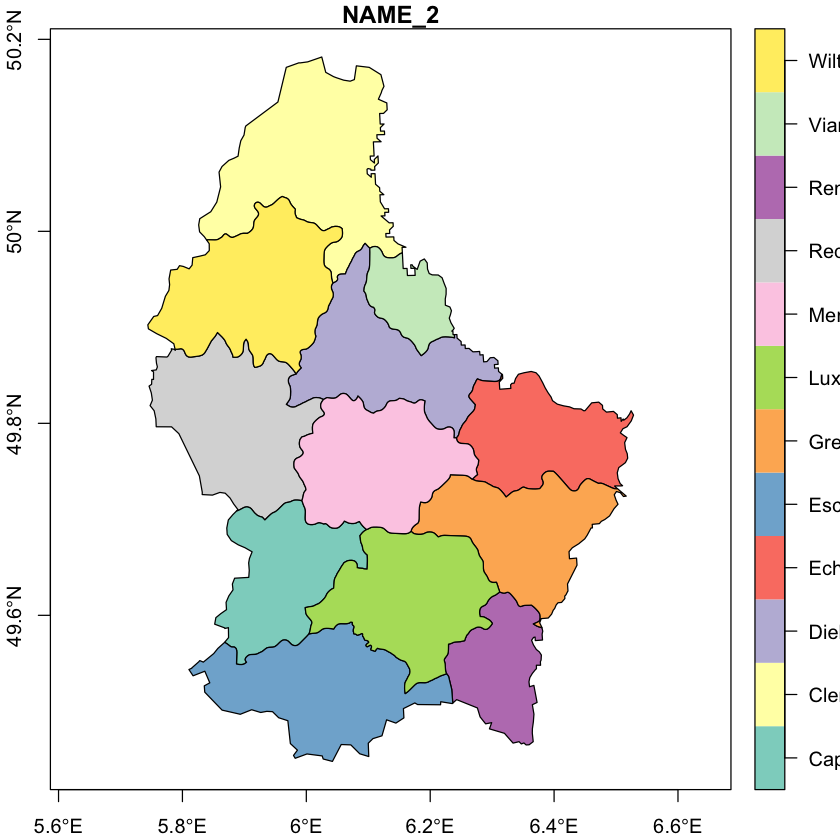

In [22]:
plot(lux[4],axes = T)

We can extract the values of a specific column like this:

In [23]:
lux$NAME_2

[1] Clervaux         Diekirch         Redange          Vianden         
 [5] Wiltz            Echternach       Remich           Grevenmacher    
 [9] Capellen         Esch-sur-Alzette Luxembourg       Mersch          
12 Levels: Capellen Clervaux Diekirch Echternach ... Wiltz

In some cases you may want to add a column of additional values to the polygon object, e.g. if you want to code which of these regions you have sampled (`1` stands for samples and `0` stands for not sampled):

Warning message in classInt::classIntervals(values, nbreaks, breaks):
“n greater than number of different finite values\nn reset to number of different finite values”Warning message in classInt::classIntervals(values, nbreaks, breaks):
“n same as number of different finite values\neach different finite value is a separate class”

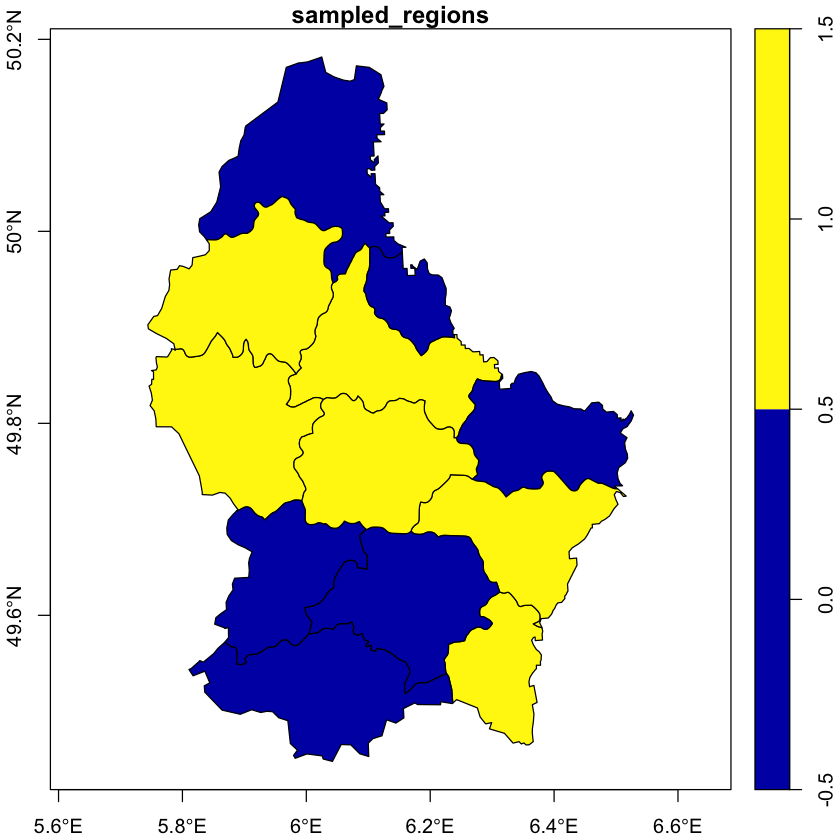

In [24]:
new_values = c(0,1,1,0,1,0,1,1,0,0,0,1)
lux$sampled_regions = new_values
plot(lux['sampled_regions'],axes = T)

You can easily remove the column you just added above, using this command

In [25]:
lux$sampled_regions <- NULL

But for now let's add the new column again and selectively only plot those areas that have not yet been sampled. We can do that by finding the indexes `i` for the regions where our new column has the value 0 and then extracting all of those rows from the spatial data object:

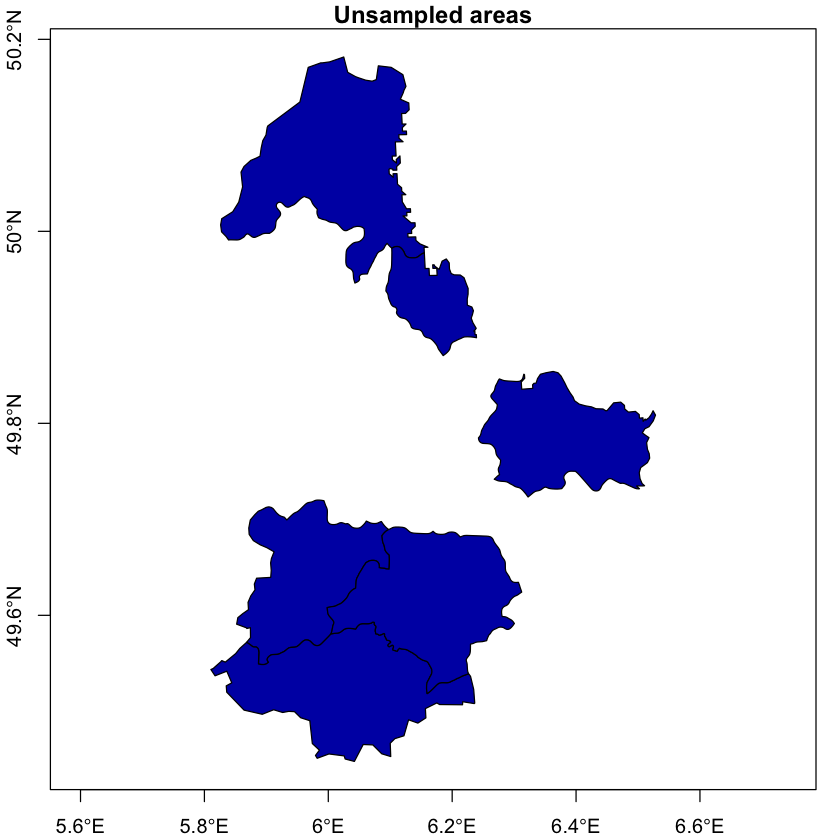

In [26]:
new_values = c(0,1,1,0,1,0,1,1,0,0,0,1)
lux$sampled_regions = new_values
i <- which(lux$sampled_regions == 0)
g <- lux[i,]
plot(g['sampled_regions'],main='Unsampled areas',axes = T)

### Creating raster over polygon and convert raster back to polygon
Let's say we want to divide our polygon into 4 equally sized cells. To do this we first need to rasterize the polygon data and then convert the raster back to polygon.

In [27]:
z <- raster(lux_spatial, nrow=2, ncol=2, vals=1:4)
z <- as(z, 'SpatialPolygonsDataFrame')

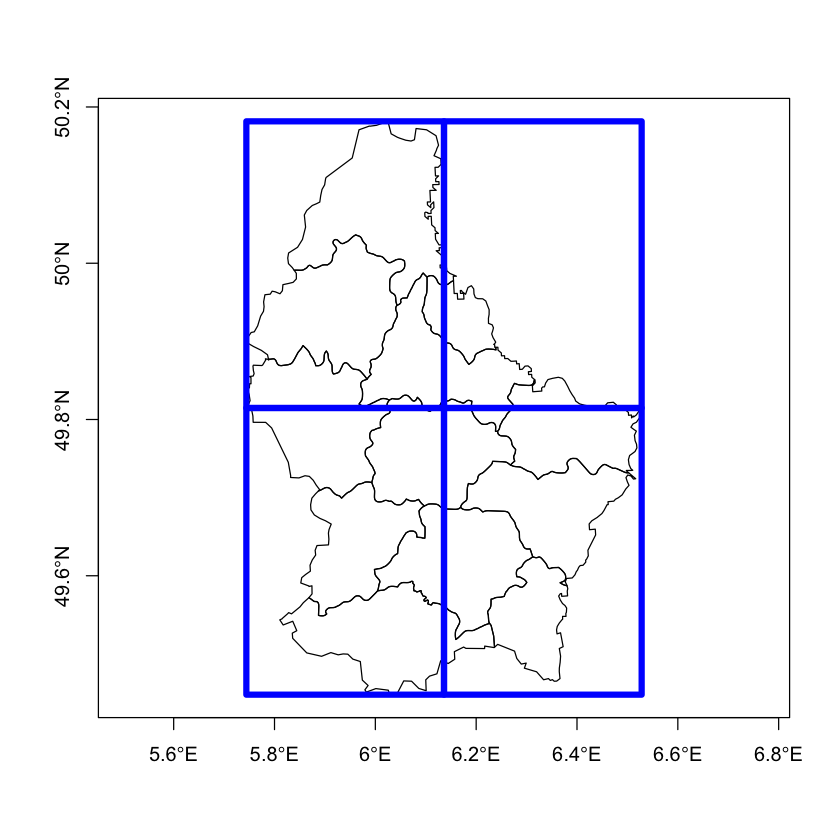

In [28]:
plot(lux['geometry'],axes = T)
plot(z, add=TRUE, border='blue', lwd=5)

There are several useful functions when working with polygons, e.g. the `aggregate()` function, which can be used to join polygons based on their values. Let's use that function to join the area polygons by their vallues in the `NAME_1` column:

In [33]:
str(lux_spatial)

Formal class 'SpatialPolygonsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	12 obs. of  5 variables:
  .. ..$ ID_1  : num [1:12] 1 1 1 1 1 2 2 2 3 3 ...
  .. ..$ NAME_1: Factor w/ 3 levels "Diekirch","Grevenmacher",..: 1 1 1 1 1 2 2 2 3 3 ...
  .. ..$ ID_2  : num [1:12] 1 2 3 4 5 6 7 12 8 9 ...
  .. ..$ NAME_2: Factor w/ 12 levels "Capellen","Clervaux",..: 2 3 9 11 12 4 10 6 1 5 ...
  .. ..$ AREA  : num [1:12] 312 218 259 76 263 188 129 210 185 251 ...
  ..@ polygons   :List of 12
  .. ..$ :Formal class 'Polygons' [package "sp"] with 5 slots
  .. .. .. ..@ Polygons :List of 1
  .. .. .. .. ..$ :Formal class 'Polygon' [package "sp"] with 5 slots
  .. .. .. .. .. .. ..@ labpt  : num [1:2] 6.01 50.07
  .. .. .. .. .. .. ..@ area   : num 0.0392
  .. .. .. .. .. .. ..@ hole   : logi FALSE
  .. .. .. .. .. .. ..@ ringDir: int 1
  .. .. .. .. .. .. ..@ coords : num [1:331, 1:2] 6.03 6.03 6.04 6.04 6.04 ...
  .. .. .. ..@ plotOrder: int 1
  .. .. .. ..@ labpt    : num [

Loading required namespace: rgeos


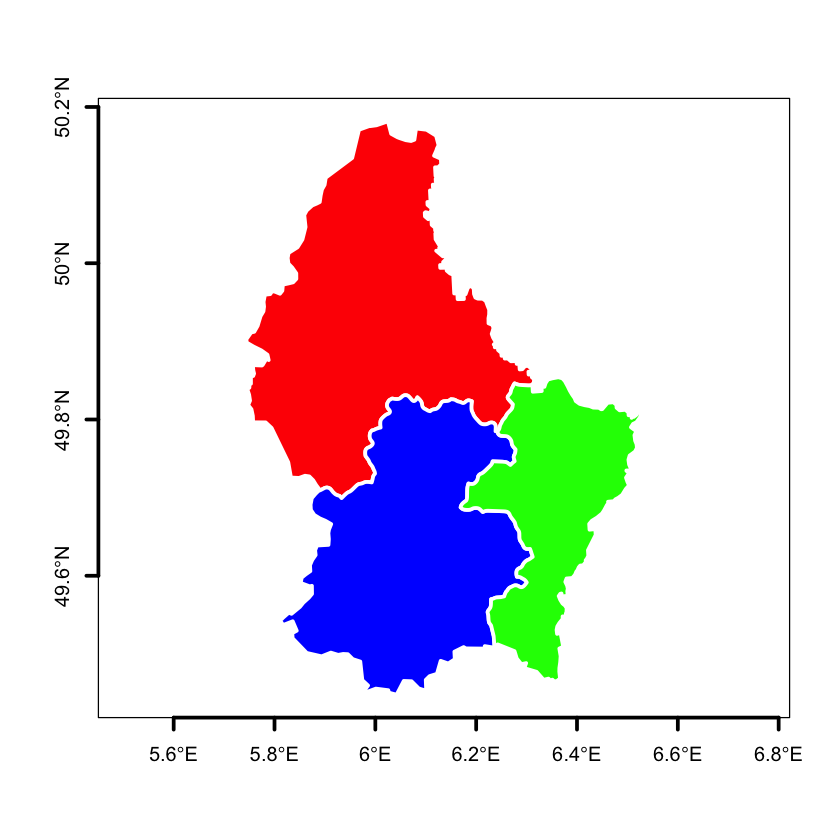

In [30]:
lux_spatial = as(lux, 'Spatial')
counties = aggregate(lux_spatial, by='NAME_1')
plot(counties, col=rainbow(3), lwd=3, border='white',axes = T)

Polygons are also really handy when it comes to operations with the overlap of multiple spatial objects. E.g. we can remove the overlap between two polygons using the `erase()` functions. Here we remove the overlap between the map of Luxembourg and the second field cell from our grid that we defined above:

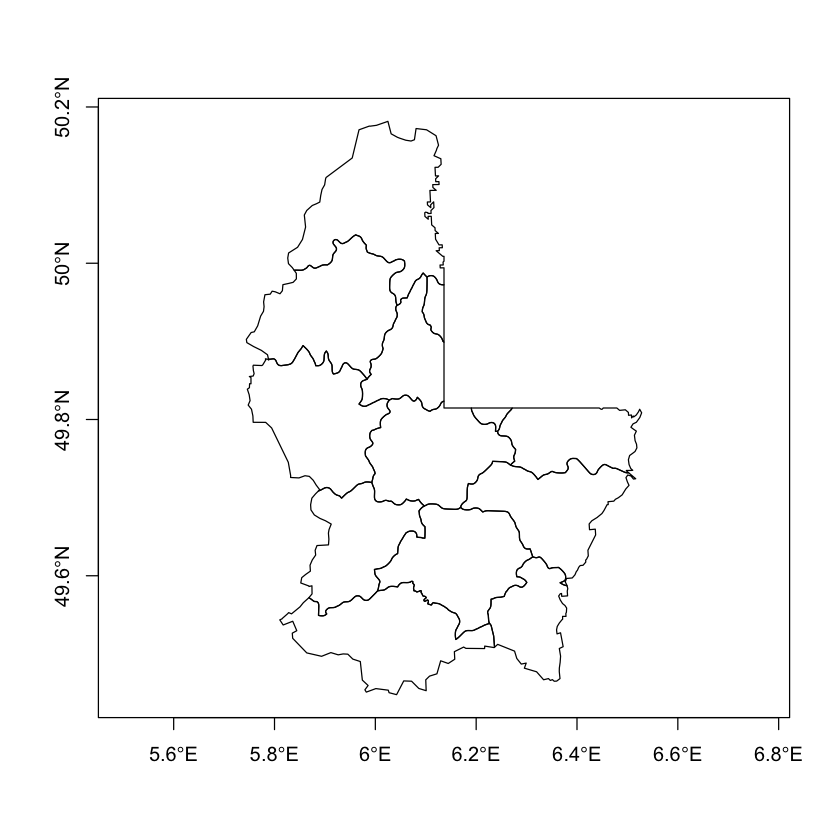

In [31]:
e <- erase(lux_spatial, z[2,])
plot(e,axes = T)

The `intersect()` function on the other hand does basically the opposite and keeps only what's shared between two polygons. Using this function we can e.g. extract the part of the map of Luxembourg that falls into our second cell of the made-up grid:

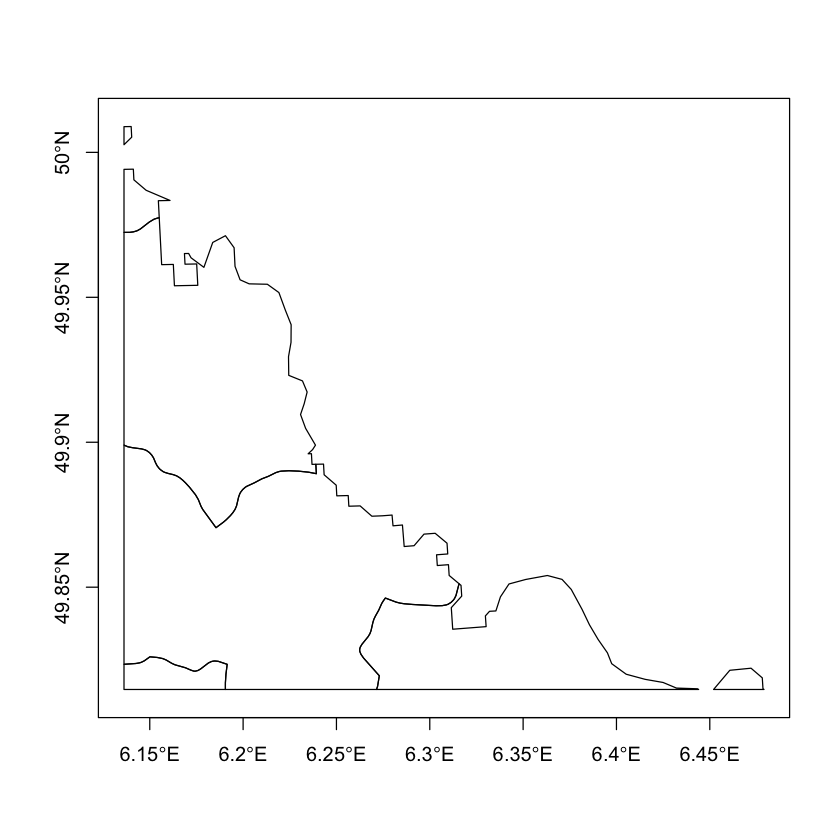

In [32]:
i <- intersect(lux_spatial, z[2,])
plot(i,axes = T)

We can also simply define a rectangle (here we made up some coordinates that are within the range of the coordinate system of the map) and extract the region that it covers. We can use the `crop()` (or the `intersect()`) function to extract the region and here we plot it in a different color to the rest of the map.

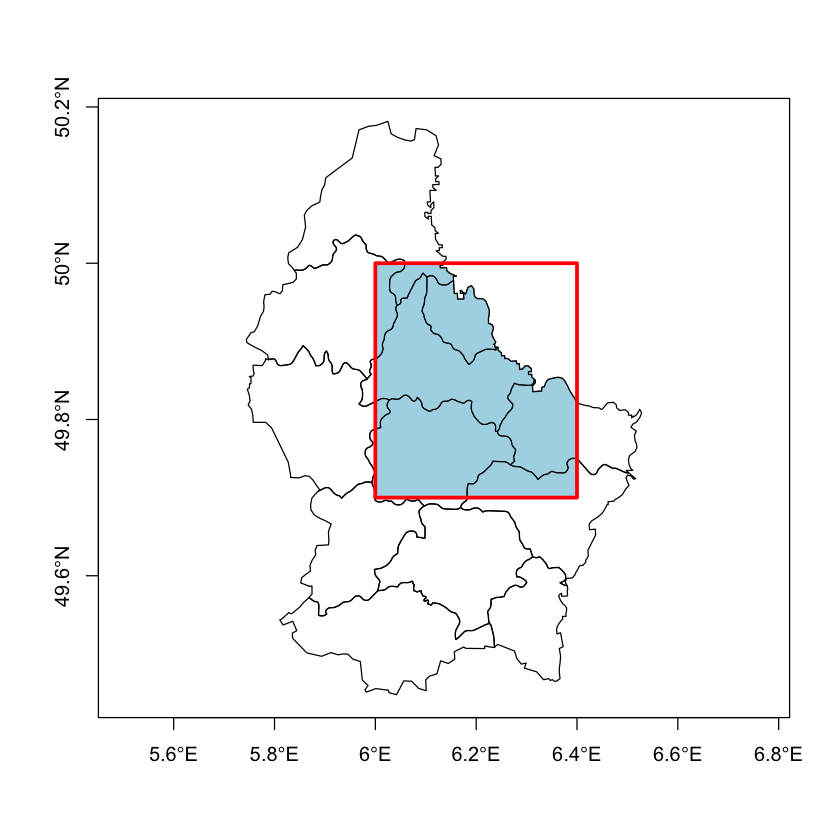

In [33]:
e <- extent(6, 6.4, 49.7, 50)
pe <- crop(lux_spatial, e)
plot(lux_spatial,axes = T)
plot(pe, col='light blue', add=TRUE)
plot(e, add=TRUE, lwd=3, col='red')

Another polygon-overlap function is the `union()` function, which can be used to join two spatial objects. As you can see in the plot below, this function creates new polygon objects from the parent objects which are defined by the borders of both of the parents. E.g. a region that was defined within out `lux_spatial` object is split into two, if an edge of the vectorized grid-object `z` runs through it:

class       : SpatialPolygonsDataFrame 
features    : 28 
extent      : 5.74414, 6.528252, 49.44781, 50.18162  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs 
variables   : 7
names       : layer, ID_1,     NAME_1, ID_2,   NAME_2, AREA, sampled_regions 
min values  :     1,    1,   Diekirch,    1, Capellen,   76,               0 
max values  :     4,    3, Luxembourg,   12,    Wiltz,  312,               1 

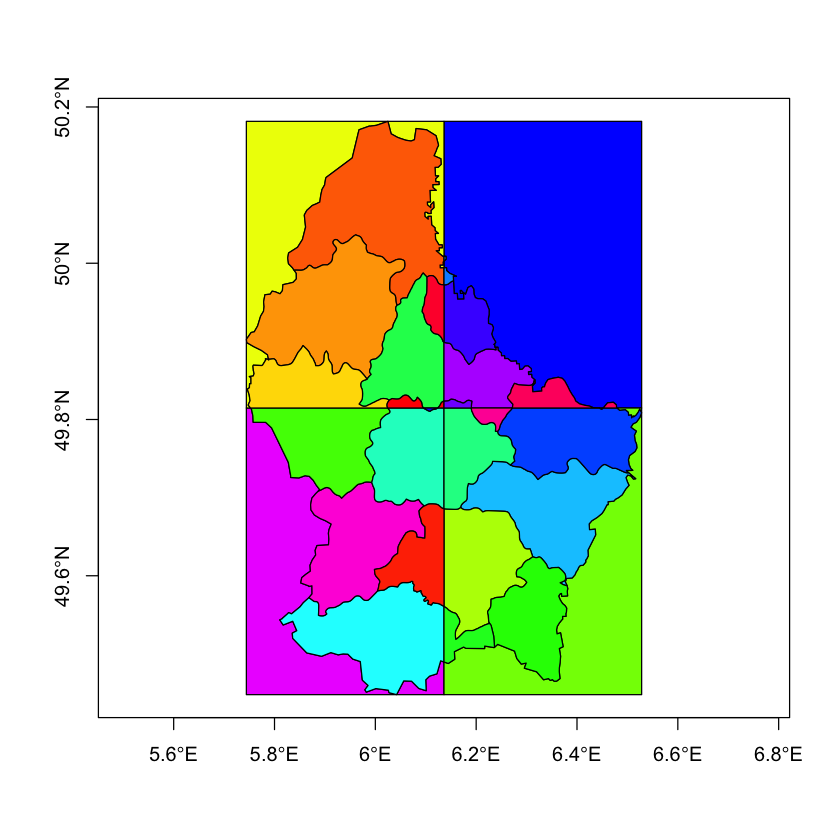

In [34]:
u <- union(lux_spatial, z)
u
set.seed(5)
plot(u,col=sample(rainbow(length(u))),axes = T)

The `cover()` function is a combination between the `intersect()` and `union()` functions. It takes the outer boundary of the polygon of the first object and intersects it with the second object, defining new polygons based on the intersect.

class       : SpatialPolygonsDataFrame 
features    : 6 
extent      : 5.74414, 6.528252, 49.44781, 50.18162  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs 
variables   : 7
names       : ID_1,       NAME_1, ID_2,     NAME_2, AREA, sampled_regions, layer 
min values  :    1,     Diekirch,    1,   Clervaux,  188,               0,     1 
max values  :    2, Grevenmacher,    6, Echternach,  312,               0,     4 

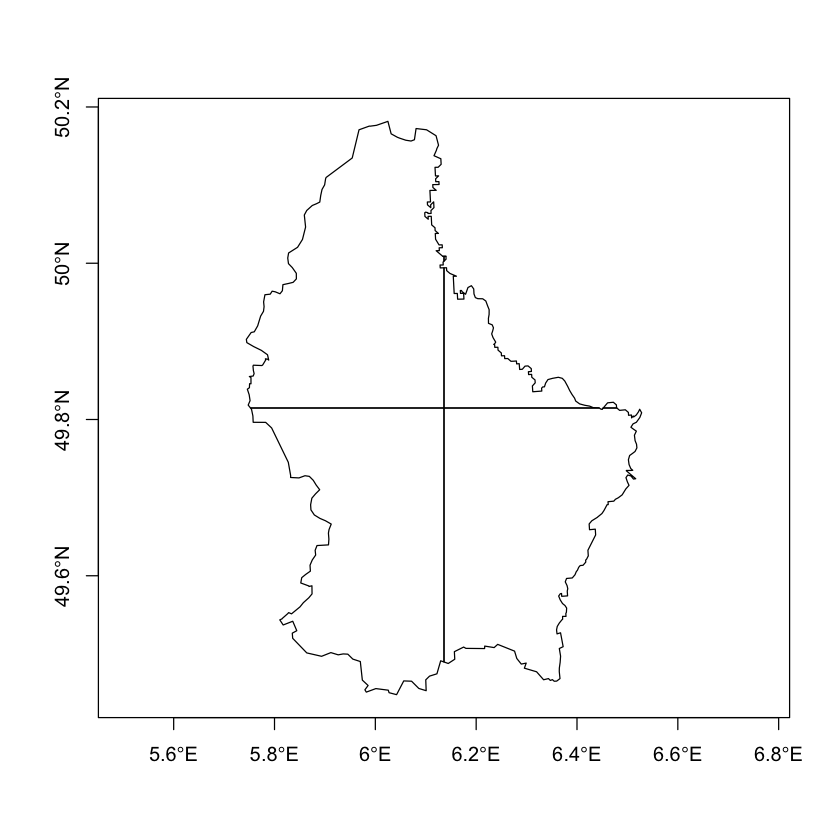

In [35]:
cov <- cover(lux_spatial, z)
cov
plot(cov,axes = T)

### Spatial queries
Let's define a set of 5 points and then check which of the polygons they fall into. First we define the points and convert them into a `SpatialPoints` object:

6.0,50.0
6.1,49.9
5.9,49.8
5.7,49.7
6.4,49.5


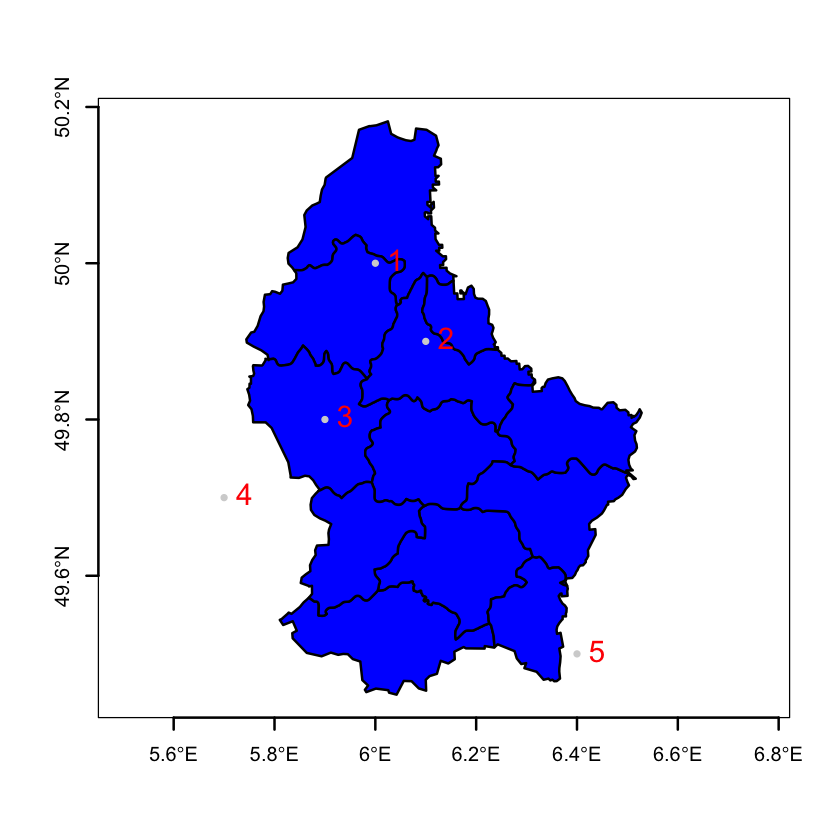

In [36]:
pts <- matrix(c(6, 6.1, 5.9, 5.7, 6.4, 50, 49.9, 49.8, 49.7, 49.5), ncol=2)
pts
spts <- SpatialPoints(pts, proj4string=crs(lux_spatial))
plot(lux_spatial, col='blue', lwd=2,axes=T)
points(spts, col='light gray', pch=20)
text(spts, 1:nrow(pts), col='red', cex=1.5,pos=4)

Now we can use the `over()` function in order to check if and where each point in our `SpatialPoints` object intersects with the `lux_spatial` polygon:

In [37]:
my_over_output = over(spts, lux_spatial)
my_over_output

ID_1,NAME_1,ID_2,NAME_2,AREA,sampled_regions
1,Diekirch,5,Wiltz,263,1
1,Diekirch,2,Diekirch,218,1
1,Diekirch,3,Redange,259,1
NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA


<div class="alert alert-block alert-warning">
Task: Plot only the regions that contain a point, using any combination of the functions that we used in the previous steps. The final plot should look like the one below:
</div>

<div class="alert alert-block alert-success">
Tip: Depending on how familiar you are with R or other programming languages, you may be able to do this without the instructions below. Maybe first give it a shot and if you get stuck, have a look at the instructions below.
    
One approach would be:
    
1. Extract a list of target region names from the `over()` function output (make sure you extract a data column that enables you to uniquely identify each region). You extract a specific data column using the `$column_name` notation following the name of the object, e.g. `my_over_output$ID_1` extracts the column `ID_1` from the `my_over_output` object. 
    
2. Identify which of the lines in the `lux_spatial` object match this list of target regions. You can use the `which()` function to determine the indeces (line numbers) that fulfil a given requirement. In order to define a requirement you can use the `%in%` notation to test which elements from one list match with elements from another, e.g. `which(lux_spatial$NAME_2 %in% my_list_of_target_regions)` returns the indeces of those polygons, whose name is present in the list `my_list_of_target_regions`.

3. Extract the target polygons from the `lux_spatial` object. Use the indeces that where produced by the `which()` command to index the polygons you which to extract, e.g. `lux_spatial[list_indeces,]` extracts all indeces present in the list `list_indeces`.

</div>

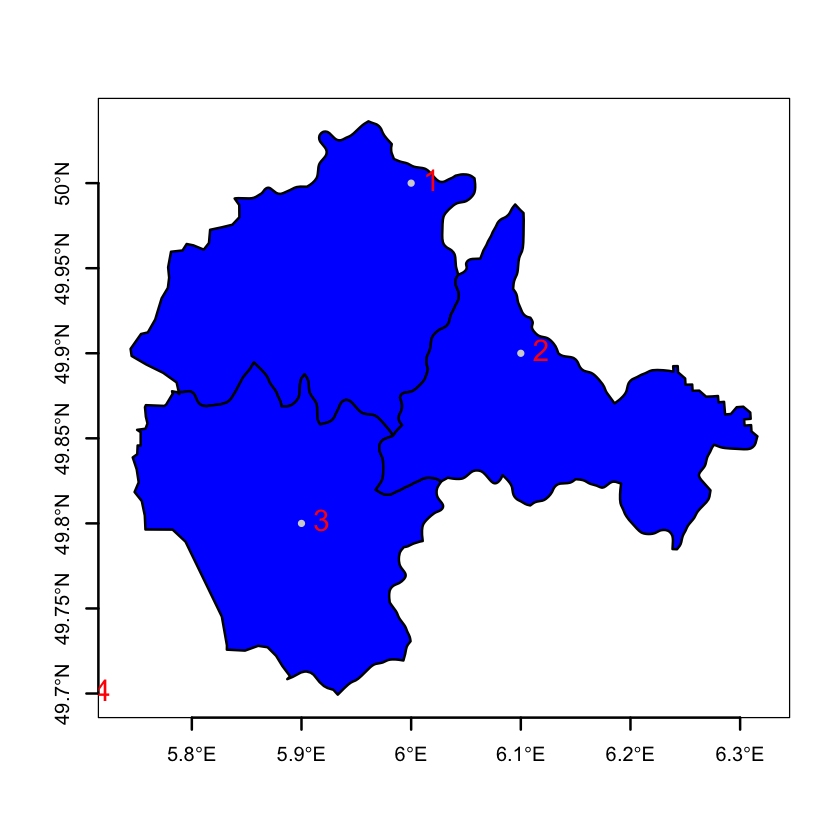

### 6. Working with raster data


It's rather straight-forward to generate a raster in R. As we did earlier in this tutorial we can just create a raster by using the `raster()` command and specifying the number of cells and extent in x and y direction. Remember that this command only creates the skeleton (empty raster). Here we just fill these cells with random numbers between 0 and 1 using the `runif()` command.

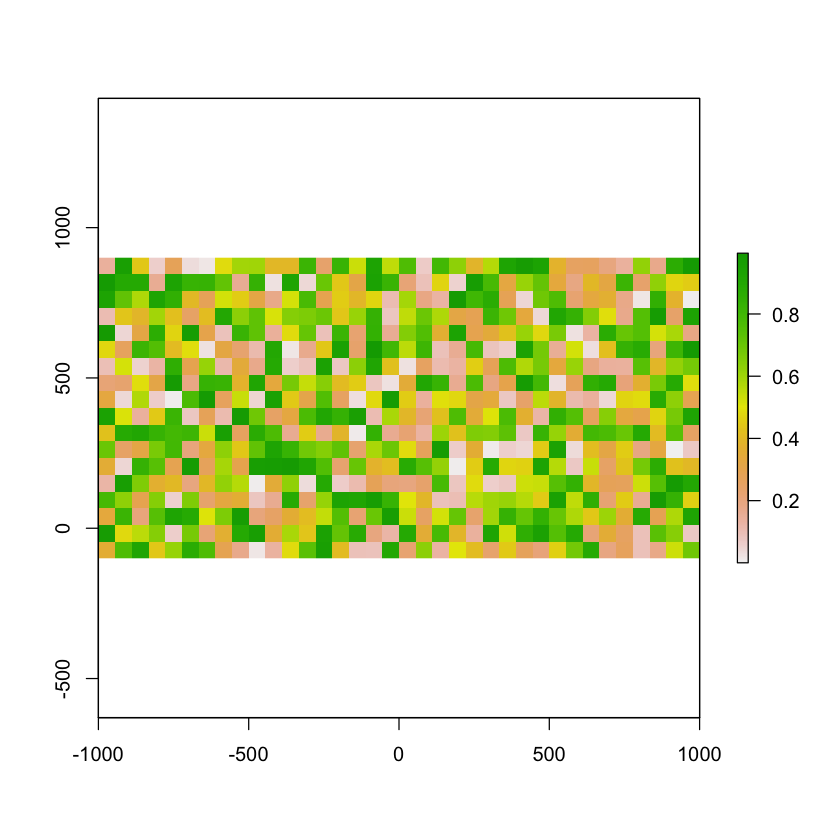

In [38]:
x <- raster(ncol=36, nrow=18, xmn=-1000, xmx=1000, ymn=-100, ymx=900)
values(x) <- runif(ncell(x))

plot(x)

You can check the resolution of the raster (dimensions of each cell) using the `res()` command:

In [39]:
res(x)

[1] 55.55556 55.55556

You can change the resolution of the raster. Let's change it to `1`:

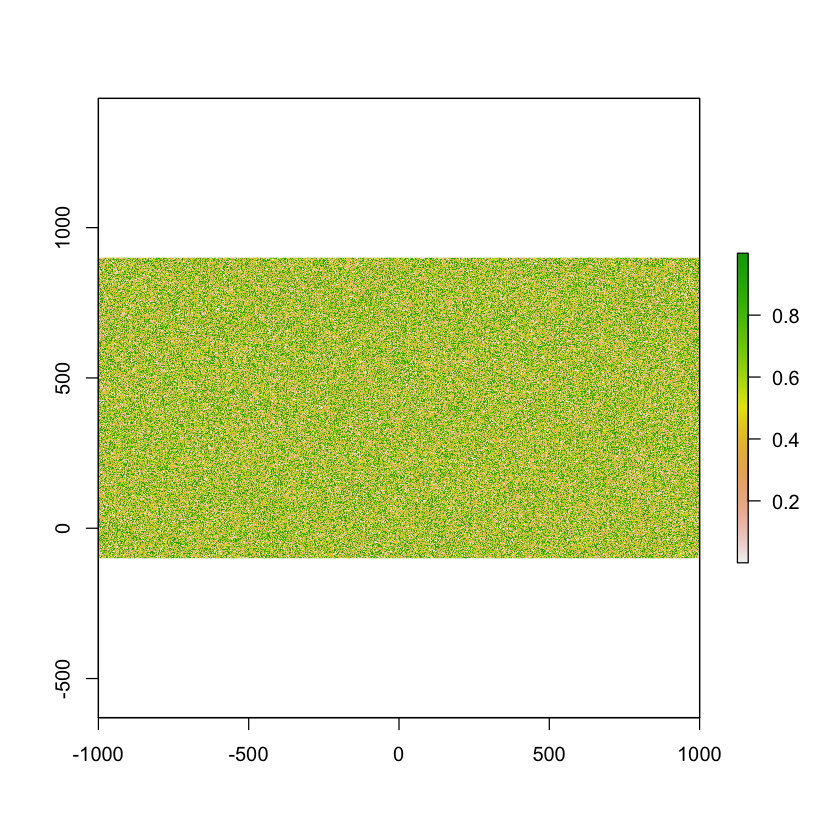

In [40]:
res(x) <- 1
values(x) <- runif(ncell(x))
plot(x)

We can access the coordinate projection of the raster using the `projection()` function and can assign a value to it (see [this link from earlier](http://rspatial.org/spatial/rst/6-crs.html) to check again the notation for different coordinate reference systems). There will be a more thorough explanation of how to decide which projection to assign to your spatial object in the [empirical data tutorial](./empirical_data_tutorial.ipynb).

In [41]:
projection(x) <- "+proj=utm +zone=48 +datum=WGS84"
projection(x)

[1] "+proj=utm +zone=48 +datum=WGS84"

Summary of some useful basic raster commands:

- **res()** - access the raster resolution (cell dimensions)
- **projection()** - access the coordinate projection of the raster
- **ncell()** - access the number of cells in the raster
- **ncol()** - access the number of columns in the raster
- **dim()** - access the dimension of the raster (cells in x and y direction)
- **values()** - access the values stored in the raster cells
- **hasValues()** - check if raster contains values or if it's just an empty skeleton
- **xmax()** - access the maximum x value
- **xmin()** - ...
- **ymax()** - ...
- **ymin()** - ...

We can stack multiple rasters into the same object by using the `stack()` command. Here we define 3 rasters with random numbers and stack them:

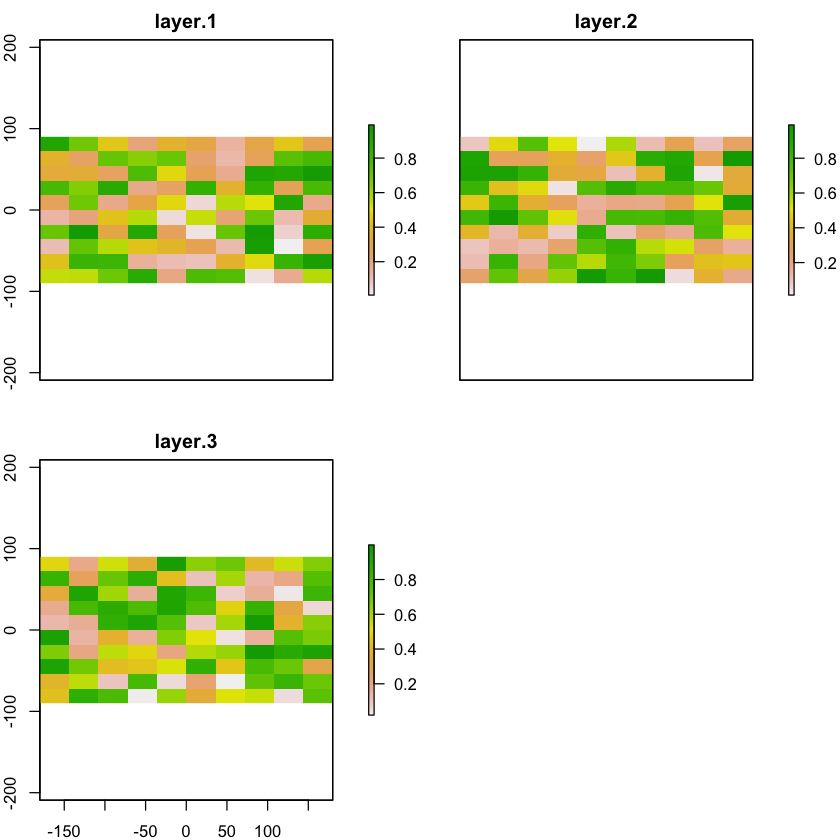

In [42]:
r1 <- r2 <- r3 <- raster(nrow=10, ncol=10)

# Assign random cell values
values(r1) <- runif(ncell(r1))
values(r2) <- runif(ncell(r2))
values(r3) <- runif(ncell(r3))

s <- stack(r1, r2, r3)
plot(s)

#### Algebraic operations with rasters 
Rasters are very straightforward to work with, since they allow the use of simple algebraic operators such as +, -, \*, /, as well as logical operators such as >, >=, <, ==, !.

For example if we want to add the values across all 3 rasters from above we can simply do that like this:


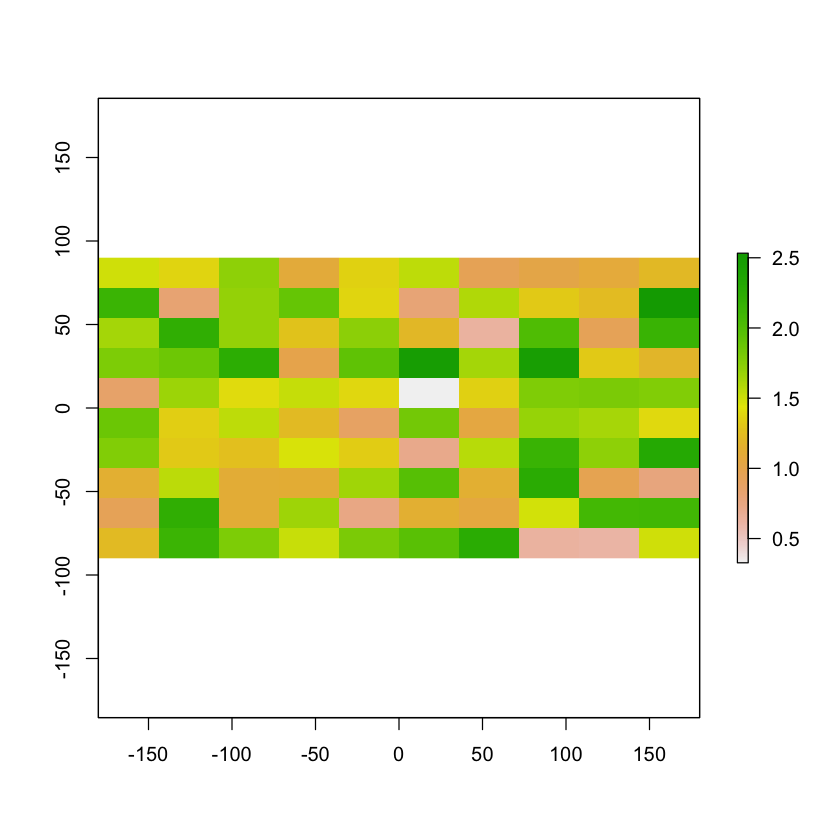

In [43]:
sum_rasters = r1 + r2 + r3
# or:
sum_rasters = sum(r1, r2, r3)

plot(sum_rasters)


### Vector to raster conversion

The raster packages supports point, line, and polygon to raster conversion with the `rasterize()` function. For vector type data (points, lines, polygons), objects of `Spatial*` classes defined in the sp package are used; but points can also be represented by a two-column matrix (x and y).

#### Points to raster
Point to raster conversion is often done with the purpose to analyze the point data. For example to count the number of distinct species (represented by point observations) that occur in each raster cell. rasterize takes a Raster object to set the spatial extent and resolution, and a function to determine how to summarize the points (or an attribute of each point) by cell.

#### Polygons to raster
Polygon to raster conversion is typically done to create a `RasterLayer` that can act as a mask, i.e. to set to `NA` a set of cells of a raster object, or to summarize values on a raster by zone. For example a country polygon is transferred to a raster that is then used to set all the cells outside that country to `NA`.

We will use examples of this in the [next tutorial](./empirical_data_tutorial.ipynb), using real data.